# Project: TMDB-MOVIES DATA ANALYSIS

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
	
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
COLUMN NAMES:
id                     
imdb_id                 
popularity             
budget                 
revenue               
original_title          
cast                   
homepage                
director                
tagline                 
keywords               
overview                
runtime                 
genres                 
production_companies    
release_date           
vote_count              
vote_average            
release_year        
budget_adj              
revenue_adj

### Question(s) for Analysis
1.Does the budget spent on the movies affect the popularity?
2.Does the movie budget affect movie ratings?
3.Does the budget affect the revenue?
4.Which year had the most release?
5.Which year had the highest budget?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_movies =pd.read_csv('tmdb-movies.csv')

In [2]:
#Inspection of the data to get a feel of it.
df_movies.head()
df_movies.info()
df_movies.tail()
df_movies.describe()
df_movies.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

(10866, 21)

#from assessing the data, some columns wont be useful and will be dropped(deleted)
the columns are; homepage,keywowrds,imdb_id,id,overview and tagline.

# DATA WRANGLING

Data Wrangling to put the data in a form that can be analysed.
This process involved dropping of unuseful columns to the analysis,checking and  deleting null values , as most of the null values were mostly strings and the null data that were not strings were not considered to be useful to the analysis.

DROPPING/DELETING UNUSEFUL COLUMNS.

In [3]:
df_movies.drop(['homepage','keywords','imdb_id','id','overview','tagline'], axis =1, inplace =True )

The code above is meant to drop the columns that will not be relevant to the analysis after proper examination of the dataframe.

In [4]:
#checking if the drop worked.
df_movies.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


CHECKING FOR NULL VALUES

In [5]:
df_movies.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The code below Checks for the data type to make sure the  columns are  in the proper format.
The relevant rows needs to be numbers. either integers or floats.

In [6]:
df_movies.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

#as seen above, the cast,genres,production_companies and director columns have null values.but it wont be adressed because they are strings and wont be a part of the analysis.

In [7]:
#deleting null values for cast, production companies and genres and directors because they are strings and cant be made up for.
#deleting any rows that have values.
df_movies.dropna(how ='any',inplace = True)

In [8]:
#Checking if the drop of null values worked.
df_movies.isnull().sum()
#it worked!

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#checking for zero values in the columns that are crucial to the analysis, these columns includes, budget, popularity,revenue,and vote_averge.


In [9]:
#To check if there are zeros in the budget column
budget_zeros =(0.00 in df_movies['budget'].unique())
print(budget_zeros)

True


#The both(revenue,budget) columns seems to have zeros in them, we will have to use the mean values to replace those zeros for a smooth analysis.

In [10]:
#To check if the there are zero values in the revenue column
revenue_zeros = (0.00 in df_movies['revenue'].unique())
print(revenue_zeros)

True


In [11]:
#To check if the there are zero values in the popularity column
popularity_zeros = (0.00 in df_movies['revenue'].unique())
print(popularity_zeros)

True


In [12]:
#To check if the there are zero values in the vote_average column
vote_average_zeros = (0.00 in df_movies['vote_average'].unique())
print(vote_average_zeros)

False


AMONGST THE SELECTED COLUMNS, ONLY THE VOTE_AVERAGE COLUMN DOES NOT HAVE A ZERO VALUE IN THE COLUMN.
THE AVERAGE VALUES WILL BE USED TO REPLACE THE ZERO VALUES IN THE COLUMNS.

CLEANING THE DATA.
The data presented happens to be quite clean, it involved checking the format of the independent variable column, decimal places. and the dependent variable as well.
This stage also involved checking for duplicates and deleting such duplicates. And replacing the zero values in the columns needed.

In [13]:
# REPLACING ZERO VALUES FOR THE BUDGET COLUMN
df_movies.budget = df_movies.budget.replace(0.00,df_movies.budget.mean())

In [14]:
#checking 
#To check if there are zeros in the budget column
budget_zeros =(0.00 in df_movies['budget'].unique())
print(budget_zeros)

#it worked!!!

False


In [15]:
#checking if the replace function worked.
df_movies.tail()
# as seen below the last 5 budget rows had 0 values prior to the replace, but they've been replaced by the mean of the budget.

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,0.080598,1.618108e+07,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,0.065543,1.618108e+07,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,0.065141,1.618108e+07,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,0.064317,1.618108e+07,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,0.035919,1.900000e+04,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [16]:
# REPLACING ZERO VALUES FOR THE REVENUE COLUMN with mean
df_movies.revenue = df_movies.revenue.replace(0.00,df_movies.revenue.mean())

In [17]:
#checking if the replacement worked
df_movies.revenue.tail()
#as seen above the revenue column had zeros in the last 5 rows and they have been replace with the mean of revenue.

10861    4.422678e+07
10862    4.422678e+07
10863    4.422678e+07
10864    4.422678e+07
10865    4.422678e+07
Name: revenue, dtype: float64

In [18]:
# REPLACING ZERO VALUES FOR THE POPULARITY COLUMN with mean
df_movies.popularity = df_movies.popularity.replace(0.00,df_movies.popularity.mean())

In [19]:
#checking if the replacement worked
#To check if the there are zero values in the popularity column
popularity_zeros = (0.00 in df_movies['revenue'].unique())
print(popularity_zeros)

#it worked!!

False


# checking for duplicates

In [20]:
df_movies.duplicated().sum()

1

The cell above contains a code that sums up the total number of duplicates in the data.

The succeeding cell will delete the duplicate ,the data happens to have only 1 duplicate. It can be deleted , since its only one and would not affect the data(9773 rows and 15 columns).
The code also checks if the drop function worked (the number of rows are going to reduce).(by using the shape function immediately after the drop_duplicates function)

In [21]:
#dropping duplicates
df_movies.drop_duplicates().shape

(9772, 15)

The code below checks for unique values.

In [22]:
df_movies.nunique()

popularity              9735
budget                   533
revenue                 4611
original_title          9512
cast                    9723
director                4505
runtime                  224
genres                  1916
production_companies    7406
release_date            5602
vote_count              1289
vote_average              68
release_year              56
budget_adj              2549
revenue_adj             4742
dtype: int64

In [23]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

     -------------------------------------- 12.6/12.6 MB 522.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): still running...
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4
  Running setup.py install for pandas: started
  Running setup.py install for pandas: still running...
  Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\willi\anaconda3\lib\site-packages\pandas-1.4.4.dist-info\
   from C:\Users\willi\anaconda3\Lib\site-packages\~andas-1.4.4.dist-info
  Moving to c:\users\willi\anaconda3\lib\site-packages\pandas\
   from C:\Users\willi\anaconda3\Lib\site-packages\~andas


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [909 lines of output]
  C:\Users\willi\AppData\Local\Temp\pip-install-hhko12d_\pandas_56638747bd674819ba26e317298d1fc1\setup.py:53: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    _CYTHON_INSTALLED = ver >= LooseVersion(min_cython_ver)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-39\pandas
  creating build\lib.win-amd64-cpython-39\pandas\api
  copying pandas\api\__init__.py

EXPLORATORY DATA ANALYSIS
The following questions will be answered using visualizations.
1.Does the budget spent on the movies affect the popularity?
2.Does the movie budget affect movie ratings?
3.Does the budget affect the revenue?


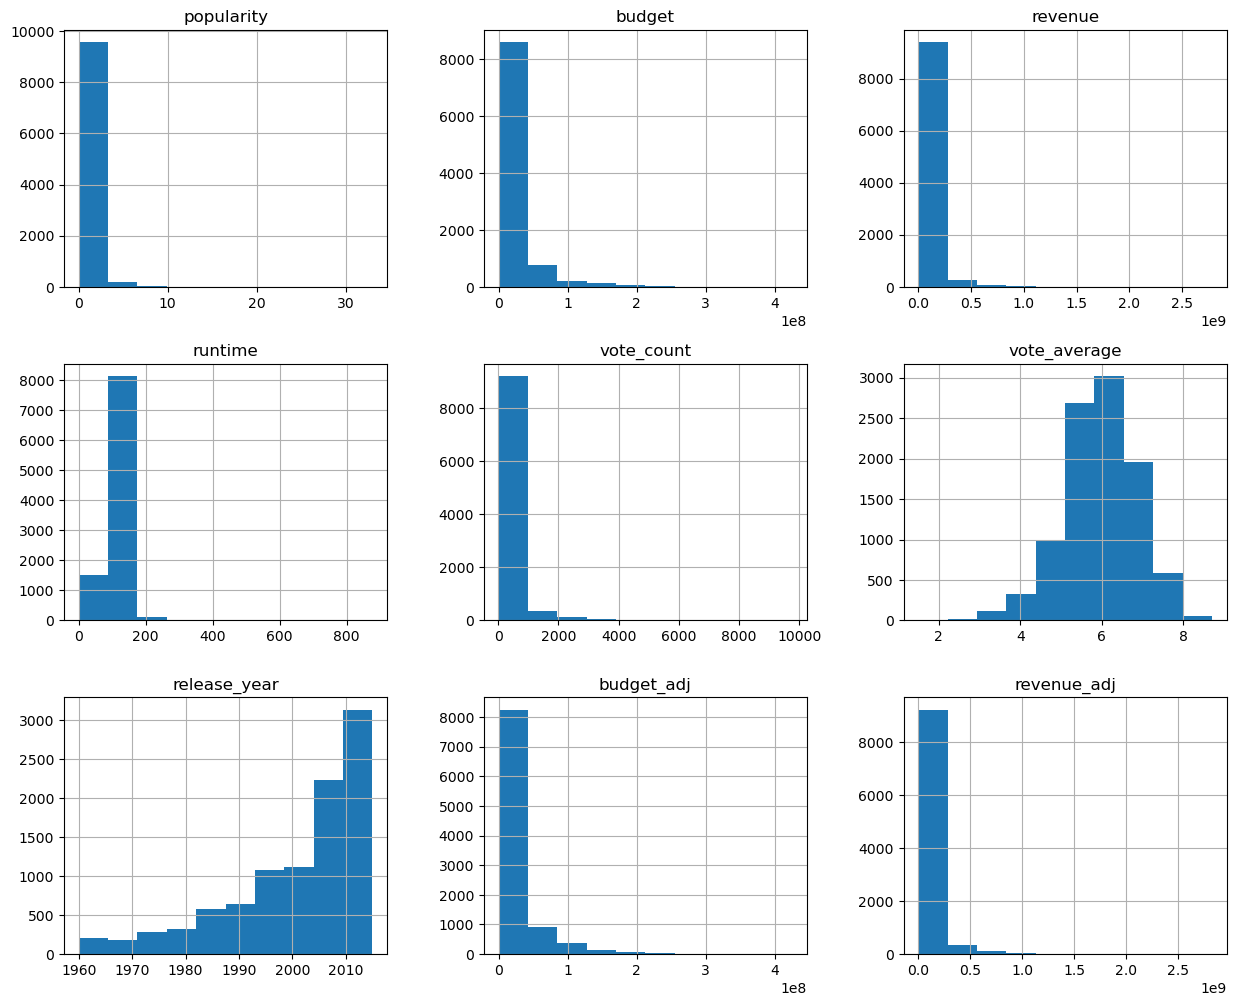

In [24]:
#this is meant to get an idea of what the general data looks like, to understand the general trend of the data.
df_movies.hist(figsize =(15,12));

In [40]:
## A heat map will be used to show correlation betweeen the numerical variables 
## Categorising the data types present
cat_var =['original_title','cast','director','genres','production_companies','release_date',]
num_vars = df_movies.select_dtypes(include='number').columns

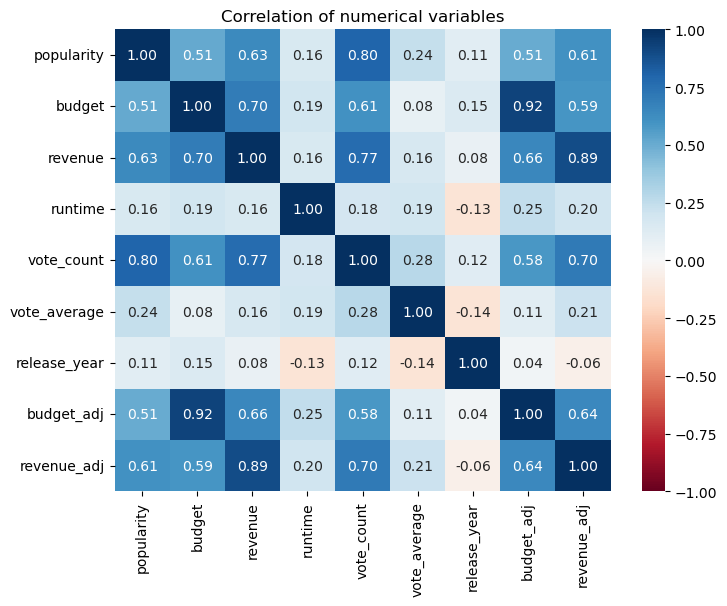

In [42]:
plt.figure(figsize=[8,6])
plt.title('Correlation of numerical variables')
sns.heatmap(data =df_movies[num_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'RdBu',vmin=-1,vmax=1, center = 0)
"""The RdBu is meant to show how positive a correlation is, with red being a strong negative and blue being a strong positive"""
plt.show()

### The plot above is meant to get a general overview of the relationship betweeen numerical variables and how they affect each other, the more intense a color is, the stronger the correlation.It can either be a strong positive or negative correlation. The blue color is meant to capture positive correlation, the red is meant to capture negative correlation.
### The vote count variable is seen to have a strong positive correlation with the popularity,budget and revenue related  variables.
### Popularity is also seen to have a strong correlation with budget and revenue variables as well.
### vote_average is seen to have a very weak correlation with the budget variable and the runtime variable. It's also seen to have a very weak negative correlation with release_year variable.

## A scatterplot will be used to further investigate the relationship to depict a clearer relationship.

# QUESTION 1.Does the budget spent on the movie affect poularity?


# creating a custom function for scatterplots using matplotlib.

In [25]:
def scat_plot (x,y,title,xlabel,ylabel,**kwargs):
    fig, ax = plt.subplots()
   '''This function is meant to create a scatter plot'''
    ax.scatter(x,y)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

A scatter plot will be used to determine if there is a possitive correlation.

## scatterplot of budget against popularity.

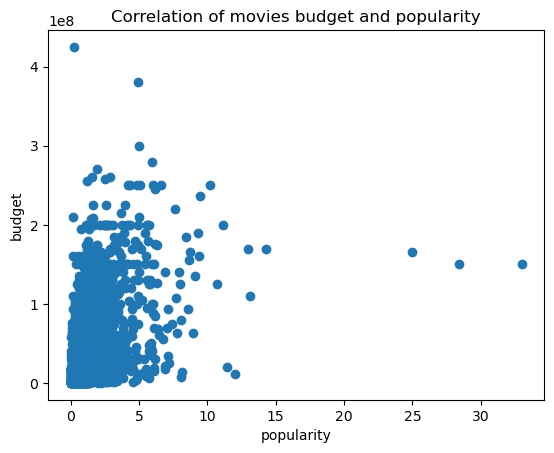

In [26]:
scat_plot(df_movies['popularity'],df_movies['budget'],'Correlation of movies budget and popularity','popularity','budget')


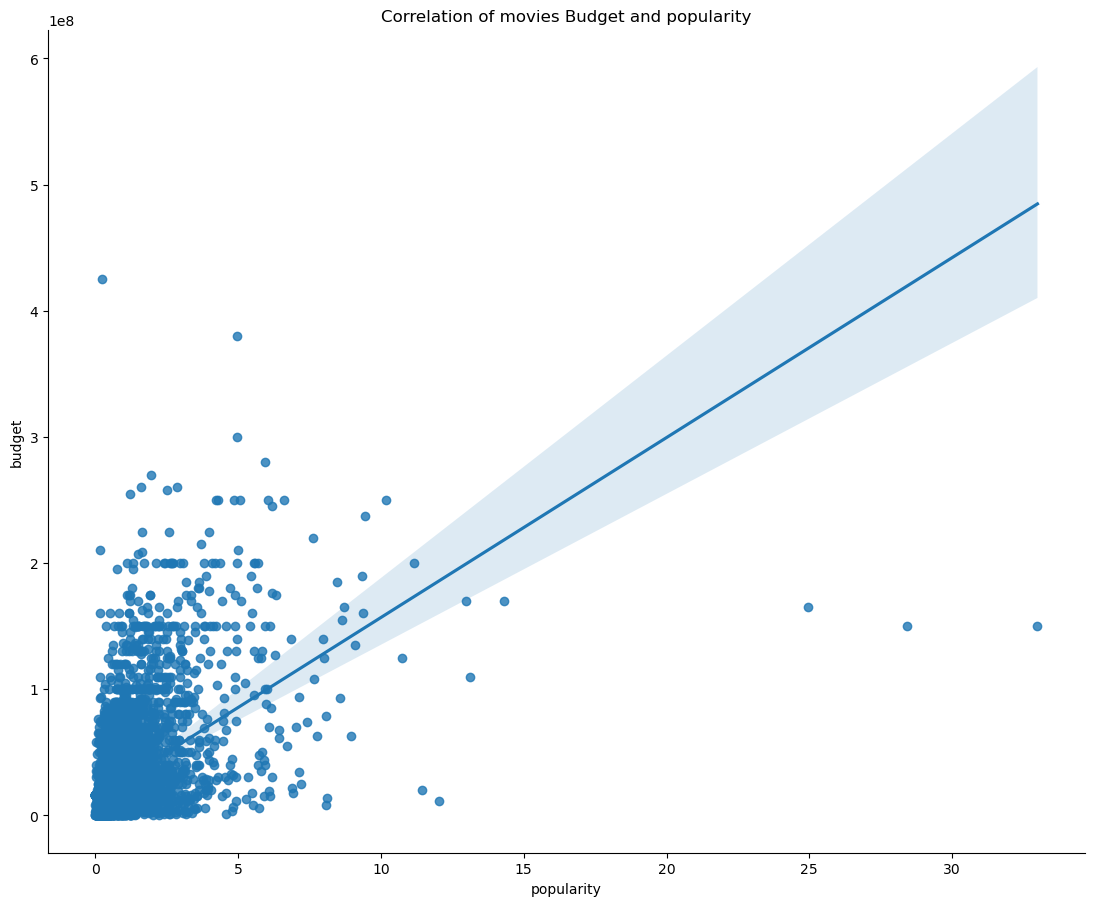

In [27]:
# scatterplot  showing if its a positive or negative correlation
sns.lmplot( data = df_movies, x="popularity", y="budget").set(title ='Correlation of movies Budget and popularity')
fig = plt.gcf()
fig.set_size_inches(12,10)


From the above scatterplot, it can be said that there is a positive correlation between the budget spent on a movie and the popularity.

In [28]:
df_movies.budget.mean()

24047276.760250155

In [43]:
df_movies.popularity.max()

32.985763

In [30]:
df_movies.budget.max()

425000000.0

In [31]:
#displaying the movie with highest budget to see if it's the most popular

df_movies.loc[(df_movies['budget'] == 425000000)]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,0.25054,425000000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,425000000.0,11087569.0


In [32]:
#sorting the popularity column to check if the most popular moovies have the highest budgets.
df_movies.sort_values(by ="popularity", ascending = False).head(100)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
629,24.949134,165000000.0,6.217525e+08,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08
630,14.311205,170000000.0,7.733124e+08,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5428,4.877927,100000000.0,3.920007e+08,The Wolf of Wall Street,Leonardo DiCaprio|Jonah Hill|Margot Robbie|Kyl...,Martin Scorsese,180,Crime|Drama|Comedy,Paramount Pictures|Appian Way|EMJAG Production...,12/25/13,4027,7.9,2013,9.360334e+07,3.669257e+08
1923,4.840588,250000000.0,9.543059e+08,Harry Potter and the Deathly Hallows: Part 1,Daniel Radcliffe|Emma Watson|Rupert Grint|Ralp...,David Yates,146,Adventure|Fantasy|Family,Warner Bros.|Heyday Films,10/17/10,3467,7.4,2010,2.500000e+08,9.543059e+08
7882,4.831966,6400000.0,7.837120e+07,The Terminator,Arnold Schwarzenegger|Michael Biehn|Linda Hami...,James Cameron,108,Action|Thriller|Science Fiction,Orion Pictures|Pacific Western|Hemdale Film|Ci...,10/26/84,2692,7.1,1984,1.343387e+07,1.645044e+08
7987,4.828854,32350000.0,5.727000e+08,Return of the Jedi,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,Richard Marquand,135,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,5/23/83,3101,7.8,1983,7.082424e+07,1.253819e+09


In [44]:
#sorting the popularity column to check if the most popular moovies have the highest budgets.
df_movies.sort_values(by ="budget", ascending = False).head(100)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,0.250540,425000000.0,1.108757e+07,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,4.250000e+08,1.108757e+07
3375,4.955130,380000000.0,1.021683e+09,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,3180,6.3,2011,3.683713e+08,9.904175e+08
7387,4.965391,300000000.0,9.610000e+08,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/07,2626,6.8,2007,3.155006e+08,1.010654e+09
14,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
6570,1.957331,270000000.0,3.910812e+08,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,6/28/06,834,5.3,2006,2.920507e+08,4.230205e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5257,1.172353,160000000.0,1.645081e+08,Speed 2: Cruise Control,Sandra Bullock|Jason Patric|Willem Dafoe|Temue...,Jan de Bont,121,Action|Adventure|Thriller,Twentieth Century Fox Film Corporation|Blue Tu...,6/12/97,233,4.4,1997,2.173537e+08,2.234777e+08
5650,0.522347,160000000.0,7.886798e+08,Fast & Furious 6,Paul Walker|Vin Diesel|Dwayne Johnson|Jordana ...,Justin Lin,130,Action|Thriller|Crime,Universal Pictures|Original Film|One Race Prod...,5/6/13,4368,6.6,2013,1.497653e+08,7.382306e+08
6,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
1934,2.245241,155000000.0,4.156862e+08,The Chronicles of Narnia: The Voyage of the Da...,Skandar Keynes|Georgie Henley|Simon Pegg|Gary ...,Michael Apted,113,Adventure|Family|Fantasy,Dune Entertainment|Fox 2000 Pictures|Walden Media,8/13/10,905,6.0,2010,1.550000e+08,4.156862e+08


### The budget spent on a movie plays a significant role in the populairty, but it's not the only factor that affects or determines how popular the movie is going to be. As seen above the most popular movie is  not the movie with the highest budget. The movie with highest budget is the warrior's way ,which had a budget of 425000000 and a popularity rating of 0.250540, while jurrassic world is the most popular movie with a score of 32 and a budget of 150000000.

# question 2: Does the movie budget affect movie ratings?
To answer this question, a scatterplot  of the budget column and the vote average column.
The scatterplot is meant to show if there is a positive or negative correlation between the both of them.


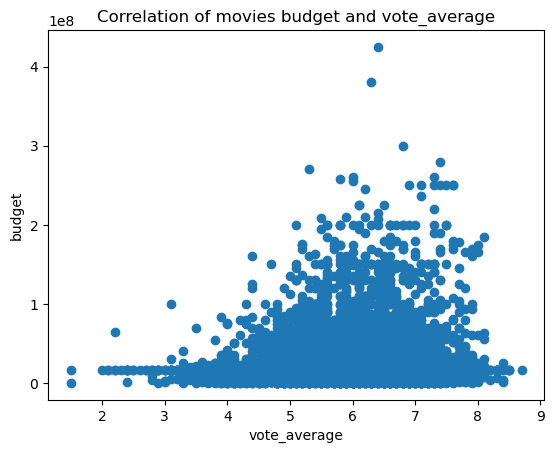

In [33]:
scat_plot(df_movies['vote_average'],df_movies['budget'],'Correlation of movies budget and vote_average','vote_average','budget')


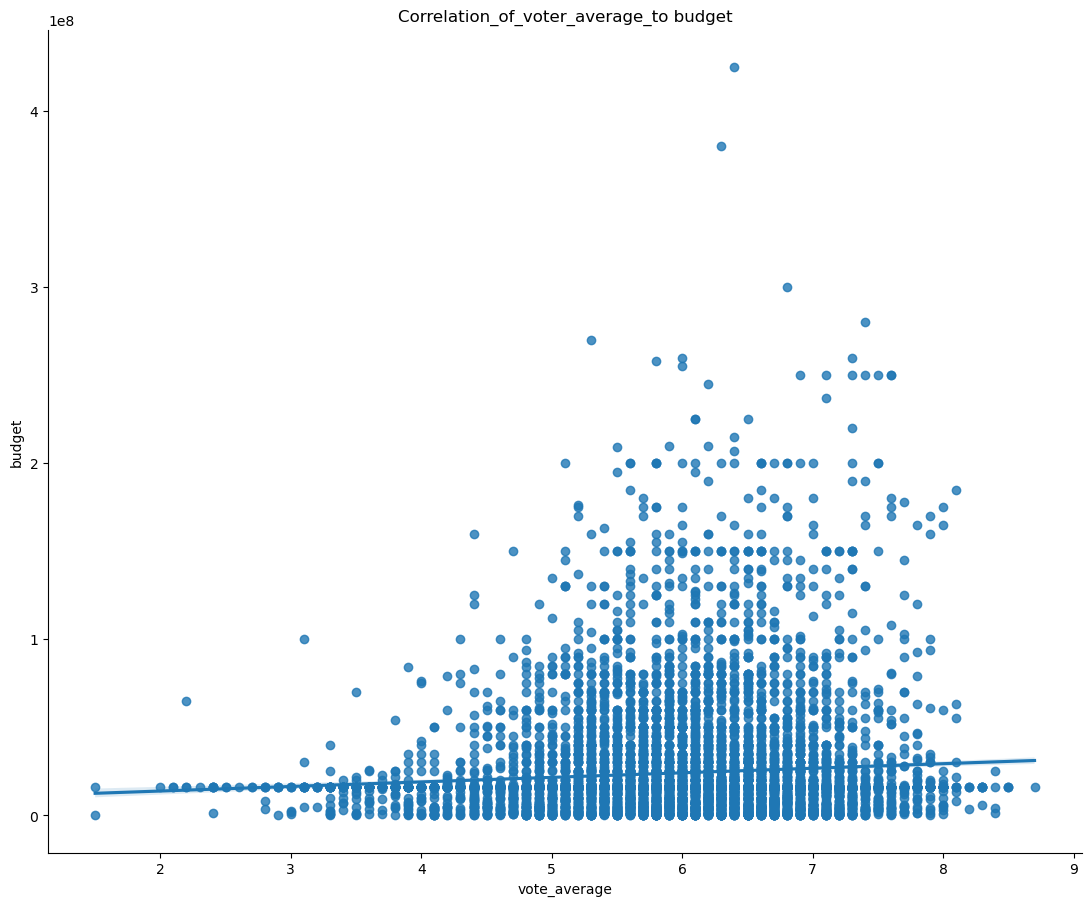

In [34]:
sns.lmplot( data = df_movies, x="vote_average", y="budget").set(title= 'Correlation_of_voter_average_to budget');
fig = plt.gcf()
fig.set_size_inches(12,10)


From the scatterplot above, it is seen that there is a very small positive correlation between both variables.

# Question 3:Does the budget affect the revenue?
To answer this question, a scatterplot of the budget and the revenue will be plotted to check for a correlation.

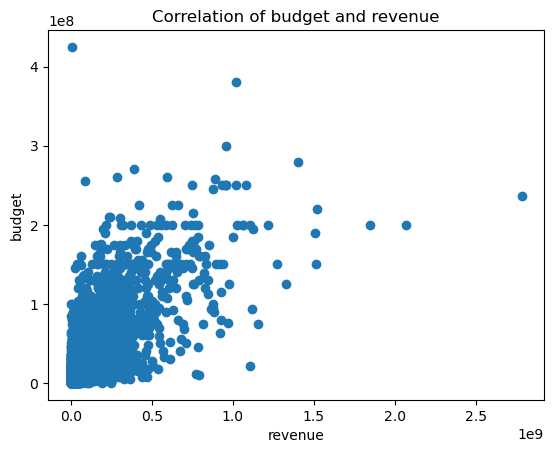

In [35]:
scat_plot(df_movies['revenue'],df_movies['budget'],'Correlation of budget and revenue','revenue','budget')


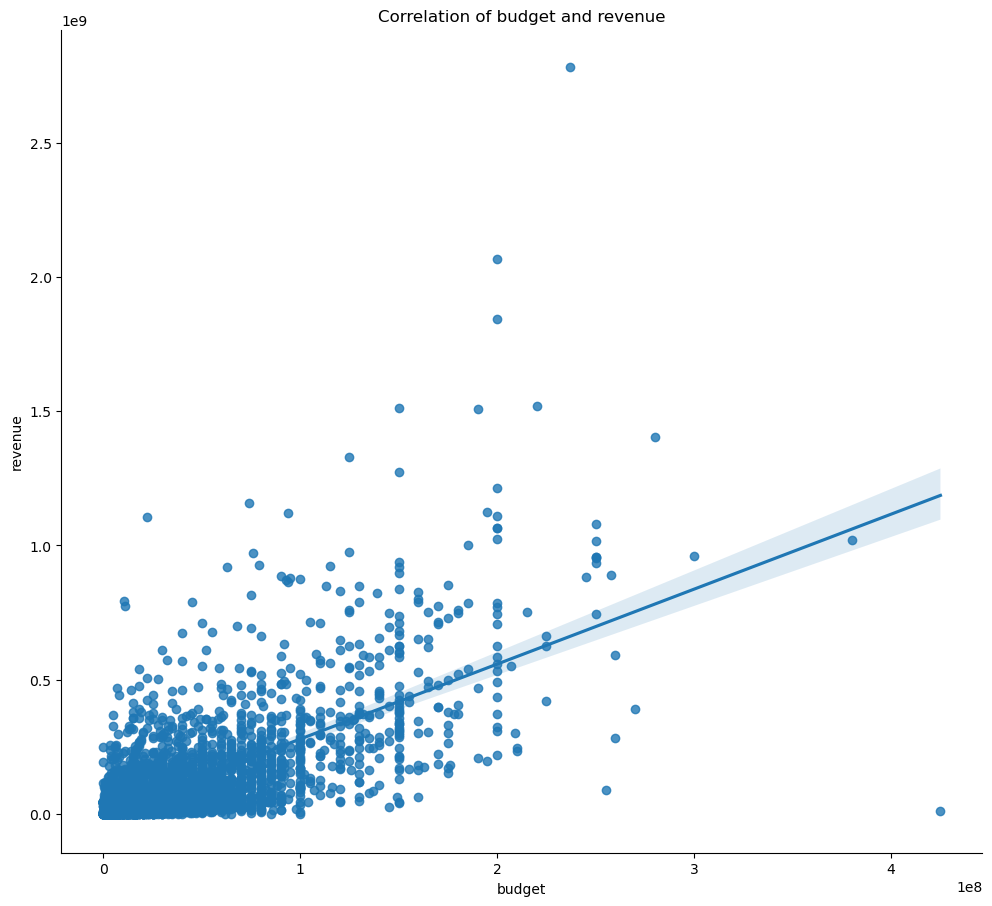

In [36]:
sns.lmplot( data = df_movies, x="budget", y="revenue").set(title ='Correlation of budget and revenue')
fig = plt.gcf()
fig.set_size_inches(11,10)


#From the scatterplot above, it can be seen that there is a positive correlation between the revenue and the budget.

## 4 Which year had the most number of movies released?

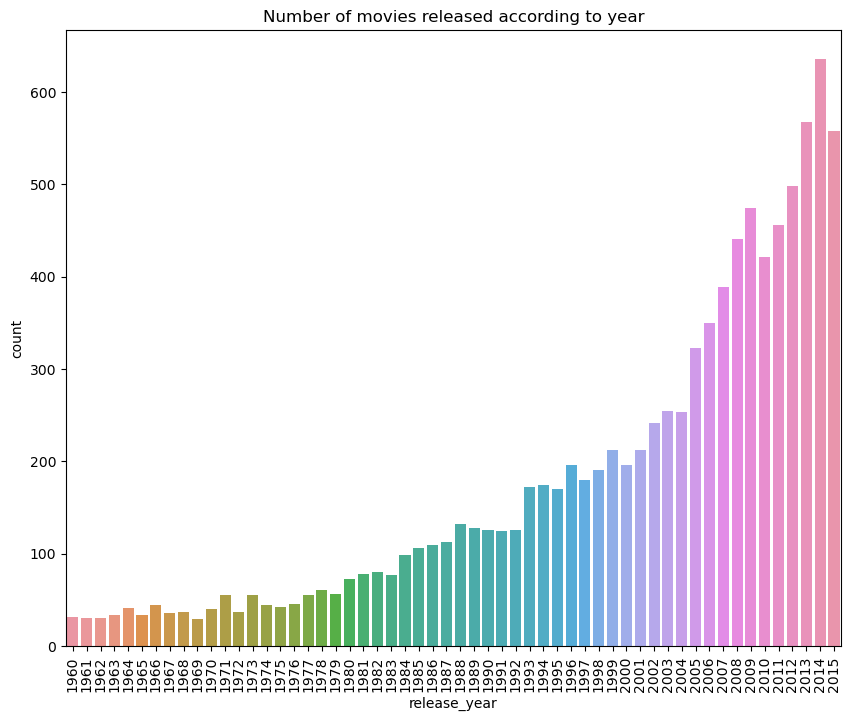

In [57]:
plt.figure(figsize=(10,8))
sns.countplot(data = df_movies, x= 'release_year')
plt.title('Number of movies released according to year')
plt.xticks(rotation=90);

## The most number of movies released in a year was in 2014. The number of movies being released increased over the years.

Text(0.5, 1.0, 'Distribution of number of movies released over the years')

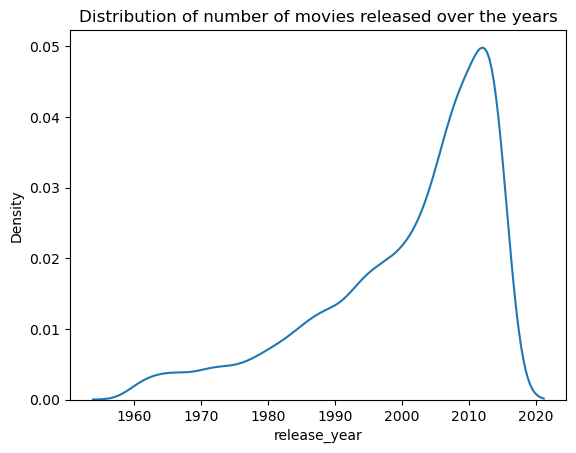

In [69]:
## A plot to show distribution of number of movies over the years
plt.Figure(figsize=(16,8))
sns.kdeplot(data = df_movies, x='release_year')
plt.title('Distribution of number of movies released over the years')


### The number of movies released over the years has gradually increased from 1960 

##  Question 5 Which year had the highest budget?

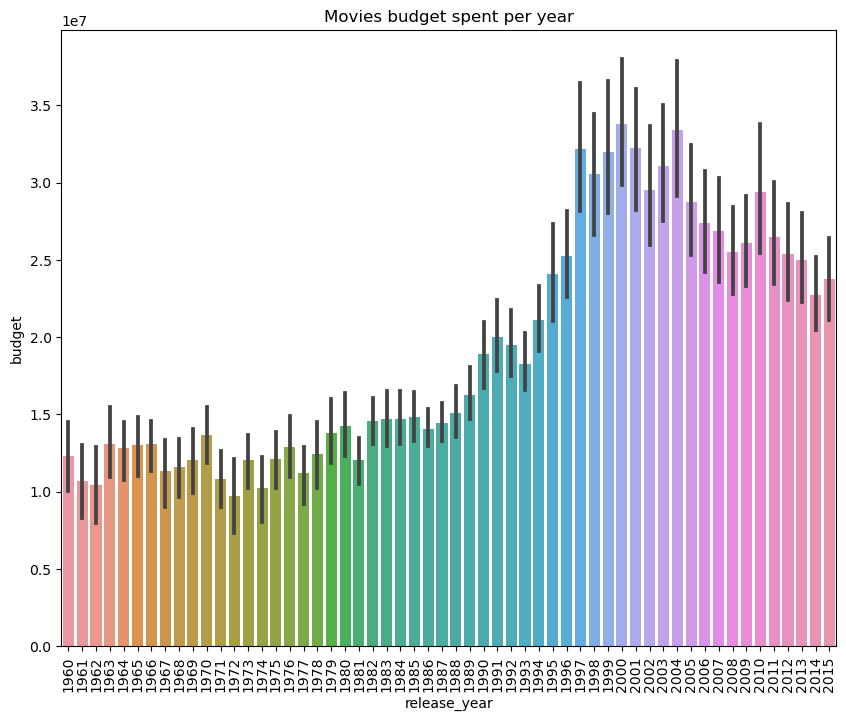

In [73]:
plt.figure(figsize=(10,8))
sns.barplot(data = df_movies, x= 'release_year',y='budget')
plt.title('Movies budget spent per year')
plt.xticks(rotation=90);

### The year 2000 had the highest budget in the data set.

# limitations
1.From proper observation of the data and the analysis carried out, the budget column was not broken down enough to show how much was spent on marketing the movie, how much was spent on paying the cast and the back screen workers, it was just a summary of the whole expenses spent on the movie.Perhaps , showing the breakdown will help us better understand and create better correlations between the revenue, populairty, average movie scores and the budget(marketing).
2.The conclusions drawn from the analysis carried out is dependent on the data presented, therefore since we were not part of the data collection process, our inference depends on it.

 # CONCLUSION

From the analysis carried out about the following questions:
1.Does the budget spent on the movies affect the popularity?
2.Does the movie budget affect movie ratings?
3.Does the budget affect the revenue?
The scatter plots above of the various questions all revealed a positive correlation between both variables, this points that the budget being allocated to shooting a movie is a significant factor that affects how the movie will be accepted(user ratings),the popularity and the revenue gotten from the movie.
The correlation between how the movie is received (user_ratings) and the budget appeared to be the lowest. 
The budget spent on movie creation happened to have a much higher positive correlation as seen from the plot than the other variables when plotted against the budget.
Although this does'nt mean that a higher budget will exclusively guarantee higher revenues or popularity or user ratings. There are many other factors such as the cast and the directors that can also affect the performance of the movie.

In [37]:
# generating a ipynb file type
from subprocess import call
call(['python', '-m', 'nbconvert', 'TMDB-MOVIES ANALYSIS.ipynb'])

1